# Let's find where I can open Turkish restaurant

In [7]:
!pip install geopy
!pip install folium
!pip install geocoder
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import geocoder
import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [8]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [17]:
CLIENT_ID = 'PJJKV4DZEWJ5OLKTGSIGMQ5AWU5KUA0IR5REELFF2P2PDTJE' # your Foursquare ID
CLIENT_SECRET = 'QQPPBRCYOEIJSL2K1Q0SG3HMIFMIRUAHVW0FHBLSOQH3YFKC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [18]:
def get_venues(lat,lng):
      
  
    #set variables
    radius=1000
    LIMIT=100
    
    #url to fetch data from foursquare api
    url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url1).json()

    venue_data=results['response']['groups'][0]['items']
 
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [19]:
def get_venue_details(venue_id):

    
    #url to fetch data from foursquare api
    url1 = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url1).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [20]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [21]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


# Turkish restaurant

In [24]:
# prepare neighborhood list that contains turkish resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
turkish_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    turkish_resturants=venues[venues['Category']=='Turkish Restaurant']   
    print('(',count,'/',len(new_york_data),')','Turkish Resturants in '+Neighborhood+', '+Borough+':'+str(len(turkish_resturants)))
    for resturant_detail in turkish_resturants.values.tolist():
        id, name , category=resturant_detail
        turkish_rest_ny = turkish_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Turkish Resturants in Wakefield, Bronx:0
( 2 / 306 ) Turkish Resturants in Co-op City, Bronx:0
( 3 / 306 ) Turkish Resturants in Eastchester, Bronx:0
( 4 / 306 ) Turkish Resturants in Fieldston, Bronx:0
( 5 / 306 ) Turkish Resturants in Riverdale, Bronx:0
( 6 / 306 ) Turkish Resturants in Kingsbridge, Bronx:0
( 7 / 306 ) Turkish Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Turkish Resturants in Woodlawn, Bronx:0
( 9 / 306 ) Turkish Resturants in Norwood, Bronx:0
( 10 / 306 ) Turkish Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Turkish Resturants in Baychester, Bronx:0
( 12 / 306 ) Turkish Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Turkish Resturants in City Island, Bronx:0
( 14 / 306 ) Turkish Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Turkish Resturants in University Heights, Bronx:0
( 16 / 306 ) Turkish Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Turkish Resturants in Fordham, Bronx:0
( 18 / 306 ) Turkish Resturants in East Tremont, Bronx:

KeyError: 'groups'

In [25]:
turkish_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bay Ridge,579d3e7c498effa33c0450af,Istanbul Bay
1,Brooklyn,Gravesend,51a2a2a3498e0d5d337f137b,Wood Spoon
2,Brooklyn,Sheepshead Bay,4fcbfc92e4b088c92e7e97ad,Opera Cafe Lounge
3,Brooklyn,Sheepshead Bay,4b1d5405f964a520d70e24e3,Liman Restaurant
4,Brooklyn,Sheepshead Bay,4a986cf5f964a520f32b20e3,Istanbul Restaurant Fish & Kebab


In [26]:
turkish_rest_ny.shape

(18, 4)

In [27]:
# prepare neighborhood list that contains turkish resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
turkish_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in turkish_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(turkish_rest_ny),')','processed')
    turkish_rest_stats_ny = turkish_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID          Name  Likes  Rating  Tips
0  579d3e7c498effa33c0450af  Istanbul Bay     23     8.1     4
( 1 / 18 ) processed
                         ID        Name  Likes  Rating  Tips
0  51a2a2a3498e0d5d337f137b  Wood Spoon      5     7.3     3
( 2 / 18 ) processed
                         ID               Name  Likes  Rating  Tips
0  4fcbfc92e4b088c92e7e97ad  Opera Cafe Lounge    257     8.2    53
( 3 / 18 ) processed
                         ID              Name  Likes  Rating  Tips
0  4b1d5405f964a520d70e24e3  Liman Restaurant     96     8.4    37
( 4 / 18 ) processed
                         ID                              Name  Likes  Rating  \
0  4a986cf5f964a520f32b20e3  Istanbul Restaurant Fish & Kebab     35     7.8   

   Tips  
0    15  
( 5 / 18 ) processed
                         ID                 Name  Likes  Rating  Tips
0  53800e9c498e1b7adfbaaf5d  Rocca Cafe & Lounge    115     7.2    20
( 6 / 18 ) processed
                         ID        

In [28]:
turkish_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Bay Ridge,579d3e7c498effa33c0450af,Istanbul Bay,23,8.1,4
1,Brooklyn,Gravesend,51a2a2a3498e0d5d337f137b,Wood Spoon,5,7.3,3
2,Brooklyn,Sheepshead Bay,4fcbfc92e4b088c92e7e97ad,Opera Cafe Lounge,257,8.2,53
3,Brooklyn,Sheepshead Bay,4b1d5405f964a520d70e24e3,Liman Restaurant,96,8.4,37
4,Brooklyn,Sheepshead Bay,4a986cf5f964a520f32b20e3,Istanbul Restaurant Fish & Kebab,35,7.8,15


In [29]:
turkish_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
Borough         18 non-null object
Neighborhood    18 non-null object
ID              18 non-null object
Name            18 non-null object
Likes           18 non-null object
Rating          18 non-null float64
Tips            18 non-null object
dtypes: float64(1), object(6)
memory usage: 1.1+ KB


In [31]:
turkish_rest_stats_ny['Likes']=turkish_rest_stats_ny['Likes'].astype('float64')

In [32]:
turkish_rest_stats_ny['Tips']=turkish_rest_stats_ny['Tips'].astype('float64')

In [33]:
turkish_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
Borough         18 non-null object
Neighborhood    18 non-null object
ID              18 non-null object
Name            18 non-null object
Likes           18 non-null float64
Rating          18 non-null float64
Tips            18 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.1+ KB


In [34]:
# Resturant with maximum Likes
turkish_rest_stats_ny.iloc[turkish_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood              Sheepshead Bay
ID              4fcbfc92e4b088c92e7e97ad
Name                   Opera Cafe Lounge
Likes                                257
Rating                               8.2
Tips                                  53
Name: 2, dtype: object

In [36]:
# Resturant with maximum Rating
turkish_rest_stats_ny.iloc[turkish_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood           Manhattan Terrace
ID              4a060d32f964a520b1721fe3
Name             Taci's Beyti Restaurant
Likes                                249
Rating                               8.7
Tips                                  67
Name: 6, dtype: object

In [37]:
turkish_rest_stats_ny.iloc[turkish_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood           Manhattan Terrace
ID              4a060d32f964a520b1721fe3
Name             Taci's Beyti Restaurant
Likes                                249
Rating                               8.7
Tips                                  67
Name: 6, dtype: object

In [55]:
ny_neighborhood_stats=turkish_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [56]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
7,Manhattan Terrace,8.7
8,Ocean Parkway,8.7
11,Yorkville,8.3
2,Bushwick,8.2
1,Bay Ridge,8.1
3,Dyker Heights,8.1
10,Upper West Side,8.0
6,Manhattan Beach,7.9
9,Sheepshead Bay,7.9
0,Bath Beach,7.7


In [51]:
ny_borough_stats=turkish_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [52]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.1500
0,Brooklyn,7.9625


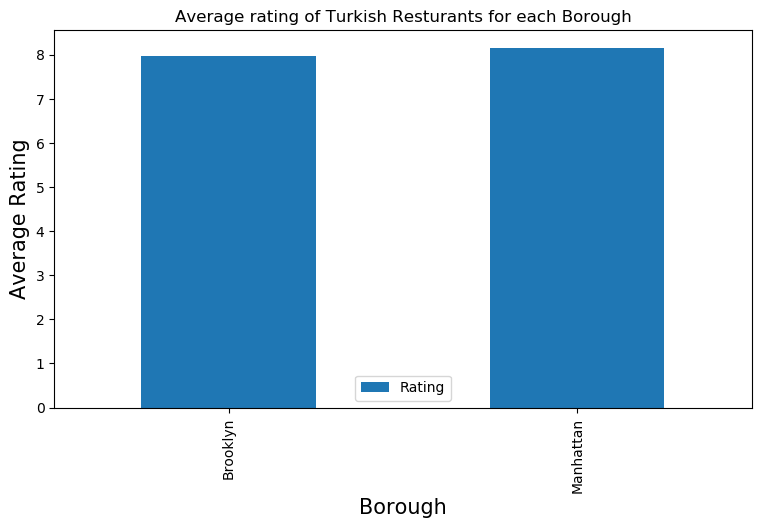

In [53]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Turkish Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
turkish_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [57]:
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Bath Beach,7.7
1,Bay Ridge,8.1
2,Bushwick,8.2
3,Dyker Heights,8.1
4,Fort Greene,7.4
5,Gravesend,7.3
6,Manhattan Beach,7.9
7,Manhattan Terrace,8.7
8,Ocean Parkway,8.7
9,Sheepshead Bay,7.9


In [58]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bath Beach,40.599519,-73.998752,7.7
1,Brooklyn,Bay Ridge,40.625801,-74.030621,8.1
2,Brooklyn,Bushwick,40.698116,-73.925258,8.2
3,Brooklyn,Dyker Heights,40.619219,-74.019314,8.1
4,Brooklyn,Fort Greene,40.688527,-73.972906,7.4
5,Brooklyn,Gravesend,40.595260,-73.973471,7.3
6,Brooklyn,Manhattan Beach,40.577914,-73.943537,7.9
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,8.7
8,Brooklyn,Ocean Parkway,40.613060,-73.968367,8.7
9,Brooklyn,Sheepshead Bay,40.586890,-73.943186,7.9


In [59]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [60]:

incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [61]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [62]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

# Cluster Neighborhoods

In [99]:
ny_neighborhood_stats


,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label
0,Brooklyn,Bath Beach,40.599519,-73.998752,7.7,"Bath Beach, Brooklyn(7.7)"
1,Brooklyn,Bay Ridge,40.625801,-74.030621,8.1,"Bay Ridge, Brooklyn(8.1)"
2,Brooklyn,Bushwick,40.698116,-73.925258,8.2,"Bushwick, Brooklyn(8.2)"
3,Brooklyn,Dyker Heights,40.619219,-74.019314,8.1,"Dyker Heights, Brooklyn(8.1)"
4,Brooklyn,Fort Greene,40.688527,-73.972906,7.4,"Fort Greene, Brooklyn(7.4)"
5,Brooklyn,Gravesend,40.595260,-73.973471,7.3,"Gravesend, Brooklyn(7.3)"
6,Brooklyn,Manhattan Beach,40.577914,-73.943537,7.9,"Manhattan Beach, Brooklyn(7.9)"
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,8.7,"Manhattan Terrace, Brooklyn(8.7)"
8,Brooklyn,Ocean Parkway,40.613060,-73.968367,8.7,"Ocean Parkway, Brooklyn(8.7)"
9,Brooklyn,Sheepshead Bay,40.586890,-73.943186,7.9,"Sheepshead Bay, Brooklyn(7.9)"


In [100]:
ny_york_cluster=ny_neighborhood_stats.groupby('Borough').count()
ny_york_cluster

,Neighborhood,Latitude,Longitude,Average Rating,Label
Borough,,,,,
Brooklyn,10,10,10,10,10
Manhattan,2,2,2,2,2


In [116]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_york_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:2] 

array([0, 1], dtype=int32)

In [126]:
ny_neighborhood_stats.insert(0, 'Cluster Labels', kmeans.labels_[0])
ny_neighborhood_stats

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label
0,0,Brooklyn,Bath Beach,40.599519,-73.998752,7.7,"Bath Beach, Brooklyn(7.7)"
1,0,Brooklyn,Bay Ridge,40.625801,-74.030621,8.1,"Bay Ridge, Brooklyn(8.1)"
2,0,Brooklyn,Bushwick,40.698116,-73.925258,8.2,"Bushwick, Brooklyn(8.2)"
3,0,Brooklyn,Dyker Heights,40.619219,-74.019314,8.1,"Dyker Heights, Brooklyn(8.1)"
4,0,Brooklyn,Fort Greene,40.688527,-73.972906,7.4,"Fort Greene, Brooklyn(7.4)"
5,0,Brooklyn,Gravesend,40.595260,-73.973471,7.3,"Gravesend, Brooklyn(7.3)"
6,0,Brooklyn,Manhattan Beach,40.577914,-73.943537,7.9,"Manhattan Beach, Brooklyn(7.9)"
7,0,Brooklyn,Manhattan Terrace,40.614433,-73.957438,8.7,"Manhattan Terrace, Brooklyn(8.7)"
8,0,Brooklyn,Ocean Parkway,40.613060,-73.968367,8.7,"Ocean Parkway, Brooklyn(8.7)"
9,0,Brooklyn,Sheepshead Bay,40.586890,-73.943186,7.9,"Sheepshead Bay, Brooklyn(7.9)"


In [127]:
ny_neighborhood_stats.loc[ny_neighborhood_stats['Borough'] == 'Manhattan', 'Cluster Labels'] = kmeans.labels_[1]

In [128]:
ny_neighborhood_stats

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label
0,0,Brooklyn,Bath Beach,40.599519,-73.998752,7.7,"Bath Beach, Brooklyn(7.7)"
1,0,Brooklyn,Bay Ridge,40.625801,-74.030621,8.1,"Bay Ridge, Brooklyn(8.1)"
2,0,Brooklyn,Bushwick,40.698116,-73.925258,8.2,"Bushwick, Brooklyn(8.2)"
3,0,Brooklyn,Dyker Heights,40.619219,-74.019314,8.1,"Dyker Heights, Brooklyn(8.1)"
4,0,Brooklyn,Fort Greene,40.688527,-73.972906,7.4,"Fort Greene, Brooklyn(7.4)"
5,0,Brooklyn,Gravesend,40.595260,-73.973471,7.3,"Gravesend, Brooklyn(7.3)"
6,0,Brooklyn,Manhattan Beach,40.577914,-73.943537,7.9,"Manhattan Beach, Brooklyn(7.9)"
7,0,Brooklyn,Manhattan Terrace,40.614433,-73.957438,8.7,"Manhattan Terrace, Brooklyn(8.7)"
8,0,Brooklyn,Ocean Parkway,40.613060,-73.968367,8.7,"Ocean Parkway, Brooklyn(8.7)"
9,0,Brooklyn,Sheepshead Bay,40.586890,-73.943186,7.9,"Sheepshead Bay, Brooklyn(7.9)"


In [131]:
# create map
map_clusters = folium.Map(location=geo_location('New York'), zoom_start=12)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhood_stats['Latitude'], ny_neighborhood_stats['Longitude'], ny_neighborhood_stats['Neighborhood'], ny_neighborhood_stats['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters